## DSC630 - Assignment 4.2: Clustering Exercise
## Author: Venkat Jagadeesh Jampani
## Date: Jan 03, 2023

In [1]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the given dataset: 'als_data.csv' and verify the by checking sample recs
als_data = pd.read_csv('als_data.csv')
als_data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


### 1. Remove any data that is not relevant to the patient’s ALS condition.

In [8]:
# I think from the given data, columns: ID and SubjectID are not revelant to paitent ALS condition. so,
# Drop ID and SubjectID columns fromm the als_data and verify
als_data = als_data.drop(['ID','SubjectID'], axis=1)
als_data.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


### 2. Apply a standard scalar to the data.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

datadf = scaler.fit_transform(als_data)

### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
# Function to create silhoutte scores coefficient
silhouette_coeff = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(datadf)
  score = silhouette_score(datadf,kmeans.labels_)
  silhouette_coeff.append(score)

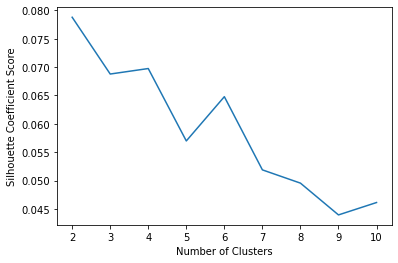

In [13]:
# Create the plot - silhouette score vs no. of clusters
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.show();

In [14]:
# print the score - silhouette score
print(silhouette_score(datadf,kmeans.labels_,metric='euclidean'))

0.046121611845315456


### 4.Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

In [15]:
#  The plot above suggests highest silhouette score for number of clusters -> 2, followed by 3 and 6
# Hence, 2 is our choice here for optimal number of clusters for K-means
model = KMeans(n_clusters=2,random_state=42)


### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [16]:
# model the Data : 'datadf'
model.fit_predict(datadf)

array([1, 1, 0, ..., 1, 1, 0])

In [17]:
# Tranform the labels to dataframe
kmeans2 = pd.DataFrame(model.labels_,columns=['Cluster'])
kmeans2.head()

,Cluster
0,1
1,1
2,0
3,1
4,0


### 6. Fit a PCA transformation with two features to the scaled data.

In [18]:
# pca transformation from the datadf and print the pca transformation array
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(datadf)
pca_transform = pca.transform(datadf)
pca_transform


array([[-1.42672861, -2.31760632],
       [-1.44023463, -4.8722099 ],
       [ 1.61785726, -0.42719225],
       ...,
       [-0.43290275,  4.24547226],
       [-0.33078392,  3.31748449],
       [ 1.4679979 ,  0.58277253]])

In [19]:
# create thedata frame frompcs_transform data frame and kmeans2
pca_transform_df = pd.DataFrame(pca_transform, columns =['pca1','pca2'])
km = pd.concat([kmeans2,pca_transform_df],axis=1)

In [20]:
km.head()

,Cluster,pca1,pca2
0,1,-1.426729,-2.317606
1,1,-1.440235,-4.872210
2,0,1.617857,-0.427192
3,1,-1.920001,2.094541
4,0,0.297710,0.167172


### 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

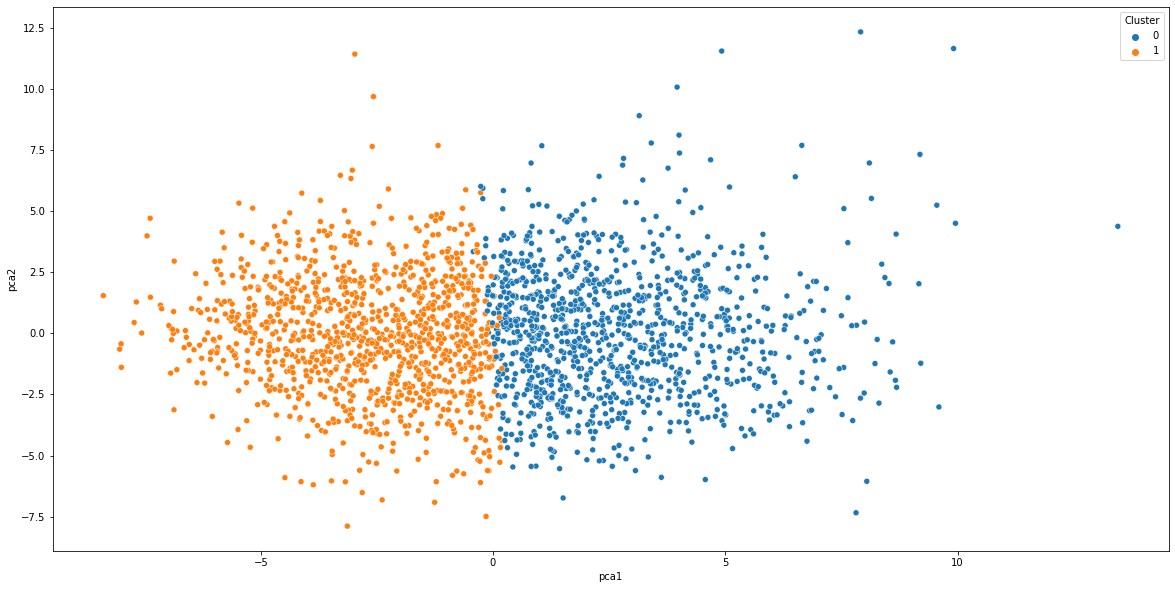

In [23]:
# Scatter plot with pca1 and pca2 in x and y axis
plt.figure(figsize=(20,10))
sns.scatterplot(data=km,x='pca1', y='pca2',hue='Cluster');

### 8. Summary

From the given data set : als_data.csv, contains different data attributes related to paitent's health, and each attributes max, min, median and range values. In the data set the attributes Subjectid and Id are not revelant to the data attributes.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The silouette score is used to decide the optimal number of clusters (k) for this assignment.

1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

Based on that, the plot suggests score 2 has more number of clusters. Created a plot with the highest numer of clusters and fit into a model. The score turned out to be ~5%(0.046)which is low indicating that the data points are not far away from data points in other clusters.